In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [16]:
def readCSV(filepath) :
  df = pd.read_csv(filepath)
  return df

def getDenominationData(sortingKeyColumnName,df):
  datadict = {}
  keylist = df[sortingKeyColumnName]
  for key in keylist:
    datadict[key] = df.groupby(sortingKeyColumnName)['Denomination'].sum().get(key,0)

  datadict = dict(sorted(datadict.items(),key=lambda item:item[1],reverse=True))
  return datadict

def Plotter(datadict):
  names = list(datadict.keys())
  values = list(datadict.values())

  width = 0.9
  fig, ax = plt.subplots()
  ind = np.arange(len(values))
  ax.barh(range(len(datadict)), values, width, color = "green", tick_label=names)

  for x_val, val in enumerate(values):
      ax.text(val + 3, x_val-0.3 , str(val),
              color = 'blue', fontweight = 'normal', fontsize='x-small', linespacing=1)

  plt.tick_label = names
  plt.xscale("log")
  #figure = plt.figure()
  #figure.set_figwidth(10)
  #figure.set_figheight(500)
  plt.show()


In [25]:
politicalparty_df = readCSV("/content/sample_data/ECI_BondData_PoliticalParty.csv")
politicalparty_df.head(5)

Deno_Data_Party = getDenominationData("Name of the Political Party",politicalparty_df)


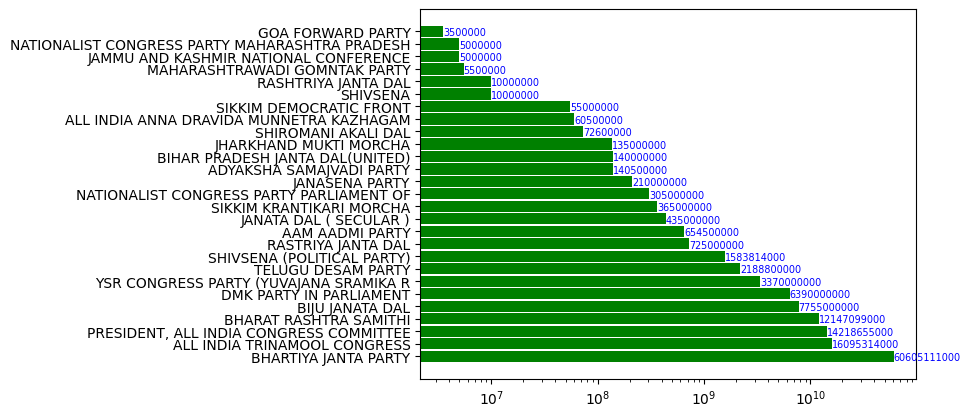

<Figure size 1000x50000 with 0 Axes>

In [26]:
Plotter(Deno_Data_Party)

In [31]:
purchasers_df = readCSV("/content/sample_data/ECI_BondData_Purchasers.csv")

Deno_Data_Purchasers = getDenominationData("Purchaser Name",purchasers_df)

<class 'dict'>


In [65]:
transposed_data = [["Company", "Amount [Rs. lakhs]"]]
for company, amount in Deno_Data_Purchasers.items():
    transposed_data.append([company, float(amount[0]/100000)])

print("=====================================================================")
print("||                            Summary                              ||")
print("=====================================================================")
print( "Number of companies : ", len(Deno_Data_Purchasers.keys()))
print()
print("=====================================================================")

print(tabulate(transposed_data, headers="firstrow", tablefmt="heavy_grid",floatfmt="0.4f"))

||                            Summary                              ||
Number of companies :  1316

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Company                                                       ┃   Amount [Rs. lakhs] ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ FUTURE GAMING AND HOTEL SERVICES PR                           ┃          120800.0000 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED                ┃           82100.0000 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ QWIKSUPPLYCHAINPRIVATELIMITED                                 ┃           41000.0000 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ HALDIA ENERGY LIMITED                                         ┃           37700.0000 ┃
┣━━━━━━━━━━